In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_price_data = pd.read_csv("car_prices.csv")
car_price_data.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
# find out the information about my dataset
car_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [4]:
car_price_data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [5]:
car_price_data.shape

(558837, 16)

FIND OUT THE NULL VALUES 

In [6]:
car_price_data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [7]:
(car_price_data.isnull().sum().sum()/(car_price_data.shape[0]*car_price_data.shape[1]))*100

1.3798298967319629

WHICH COMPANY SELL MOST CARS

In [8]:
car_price_data["make"].mode()[0]

'Ford'

FILLING THE NULL VALUES IN THE COLUMN 'MAKE' (COMPANY) BY THE TOP SELLER COMPANY 

In [9]:
car_price_data["make"] = car_price_data["make"].fillna(car_price_data["make"].mode()[0])


In [10]:
car_price_data["make"].value_counts()

make
Ford          103855
Chevrolet      60197
Nissan         53946
Toyota         39871
Dodge          30710
               ...  
airstream          1
ford tk            1
chev truck         1
hyundai tk         1
Lotus              1
Name: count, Length: 96, dtype: int64

FILL THE NULL VALUES OF THE COLUMNS BY USING ANOTHER COLUMN'S RELATION

In [11]:
make_to_model = (
    car_price_data.dropna(subset=["make", "model"])
    .groupby("make")["model"]
    .agg(lambda x: x.mode()[0])
    .to_dict()
)
car_price_data["model"] = car_price_data.apply(
    lambda row: make_to_model[row["make"]] if pd.isna(row["model"]) and row["make"] in make_to_model else row["model"],
    axis=1
)

In [12]:
make_to_model2 = (
    car_price_data.dropna(subset=["model" ,"trim"])
    .groupby("model")["trim"]
    .agg(lambda x: x.mode()[0])
    .to_dict()
)
car_price_data["trim"] = car_price_data.apply(
    lambda row: make_to_model2[row["model"]] if pd.isna(row["trim"]) and row["model"] in make_to_model2 else row["trim"],
    axis=1
)

In [13]:
make_to_model3 = (
    car_price_data.dropna(subset=["make", "body"])
    .groupby("make")["body"]
    .agg(lambda x: x.mode()[0])
    .to_dict()
)
car_price_data["body"] = car_price_data.apply(
    lambda row: make_to_model3[row["make"]] if pd.isna(row["body"]) and row["make"] in make_to_model3 else row["body"],
    axis=1
)

In [14]:
#we don't need the 'transmission' columns nay more
car_price_data.drop(columns = "transmission" , axis = 1,inplace = True)

In [15]:
mean_condition = car_price_data["condition"].mean()

In [16]:
mean_condition

30.672364844237016

In [17]:
car_price_data["condition"] = car_price_data["condition"].fillna(mean_condition)


In [18]:
odometer_mean = car_price_data["odometer"].mean()
car_price_data["odometer"] = car_price_data["odometer"].fillna(odometer_mean)

In [19]:
car_price_data["color"] = car_price_data["color"].fillna(car_price_data["color"].mode()[0])

In [20]:
car_price_data["interior"] = car_price_data["interior"].fillna(car_price_data["interior"].mode()[0])

In [21]:
car_price_data["mmr"] = car_price_data["mmr"].fillna(car_price_data["mmr"].mean())

In [22]:
 sellp_to_model = (
    car_price_data.dropna(subset=["model", "sellingprice"])
    .groupby("model")["sellingprice"]
    .agg(lambda x: x.mode()[0])
    .to_dict()
)
car_price_data["sellingprice"] = car_price_data.apply(
    lambda row: sellp_to_model[row["model"]] if pd.isna(row["sellingprice"]) and row["model"] in sellp_to_model else row["sellingprice"],
    axis=1
)

In [23]:
car_price_data["saledate"] = car_price_data["saledate"].fillna(car_price_data["saledate"].mode()[0])

DATA IS CLEANED AND IT IS READY FOR VISUALIZATION

LIST OUT THE COMPANY WHICH ARE SOLD THE MOST CARS AND SHOW INTO GRAPH

In [24]:
count_of_company = car_price_data["make"].value_counts()
print("TOP 10 COMPANIES WHICH ARE SOLD THE MOST CARS FROM YEAR 1982 - 2015")
count_of_company.head(10)

TOP 10 COMPANIES WHICH ARE SOLD THE MOST CARS FROM YEAR 1982 - 2015


make
Ford         103855
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
Honda         27206
Hyundai       21816
BMW           20719
Kia           18077
Chrysler      17276
Name: count, dtype: int64

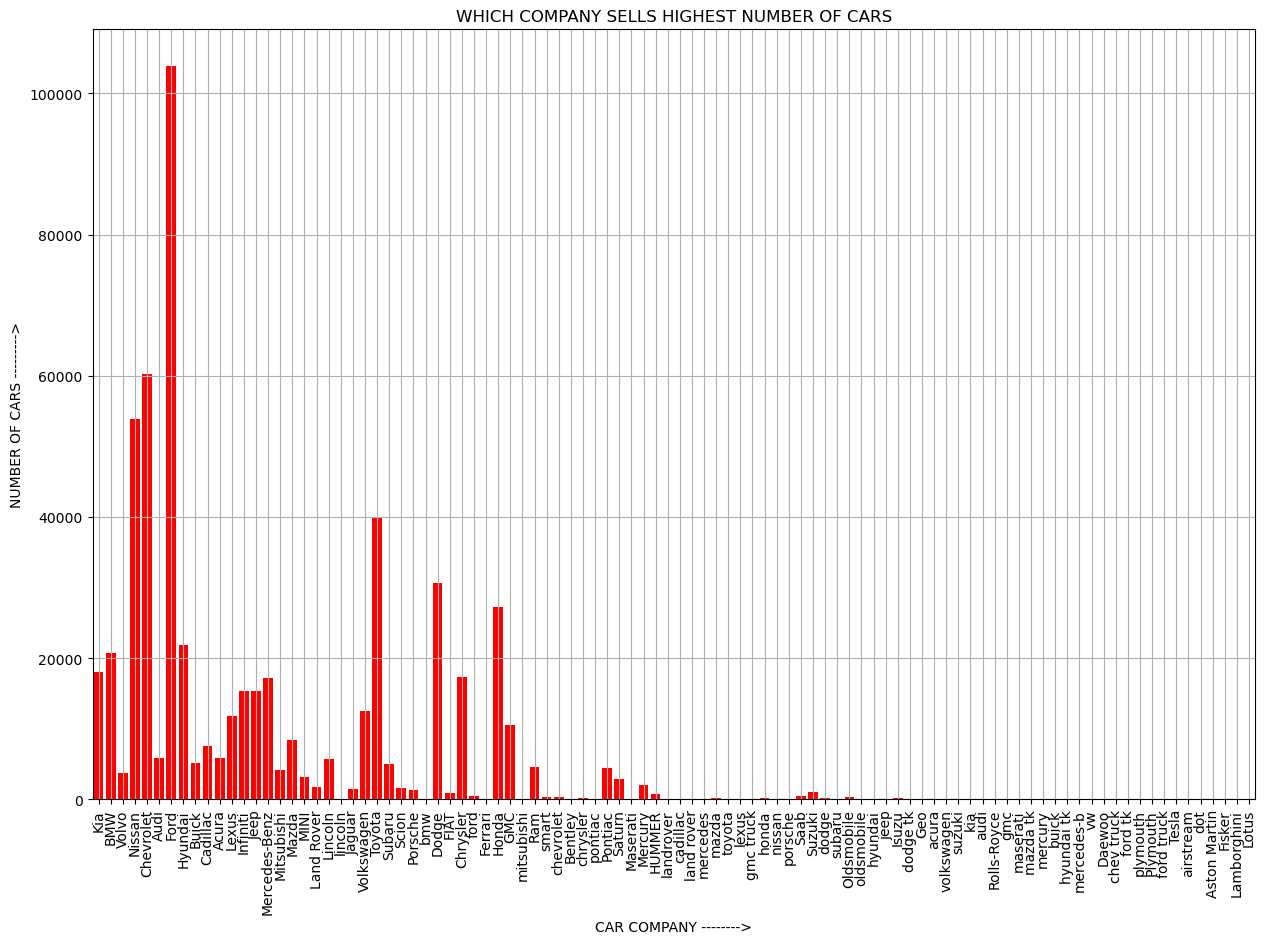

In [25]:
plt.figure(figsize= (15,10))

sns.countplot(x = 'make' , data = car_price_data,color = "red" , saturation=20,linewidth =3)
plt.title("WHICH COMPANY SELLS HIGHEST NUMBER OF CARS")
plt.xlabel("CAR COMPANY -------->")
plt.ylabel("NUMBER OF CARS --------->")
plt.grid()
plt.xticks(rotation = 90)
plt.show()

In [26]:
top_sold_car = car_price_data["make"].value_counts().idxmax()
print(f" {top_sold_car} company sold the most cars") 

 Ford company sold the most cars


In [27]:
data_ford = car_price_data[car_price_data['make'] == top_sold_car]


In [28]:
highest_year_sell_company = data_ford["year"].value_counts().idxmax()
print(f" {top_sold_car} sold highest in year {highest_year_sell_company}.")

 Ford sold highest in year 2013.


In [29]:
print("TOP 10 YEARS WITH THE HIGHEST NUMBER OF CARS SOLD")
car_price_data["year"].value_counts().head(10)

TOP 10 YEARS WITH THE HIGHEST NUMBER OF CARS SOLD


year
2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
Name: count, dtype: int64

In [30]:
car_sell_2012 = car_price_data["year"].value_counts().idxmax()

In [31]:
data_2012 = car_price_data[car_price_data['year'] == car_sell_2012]

In [32]:
top_2012_company = data_2012["make"].value_counts().idxmax()
print(f"In year {car_sell_2012} {top_2012_company} sold the most cars.")

In year 2012 Nissan sold the most cars.


BY THIS GRAPH WE FINDOUT THAT WHICH COLOR IS MOST DEMANDED

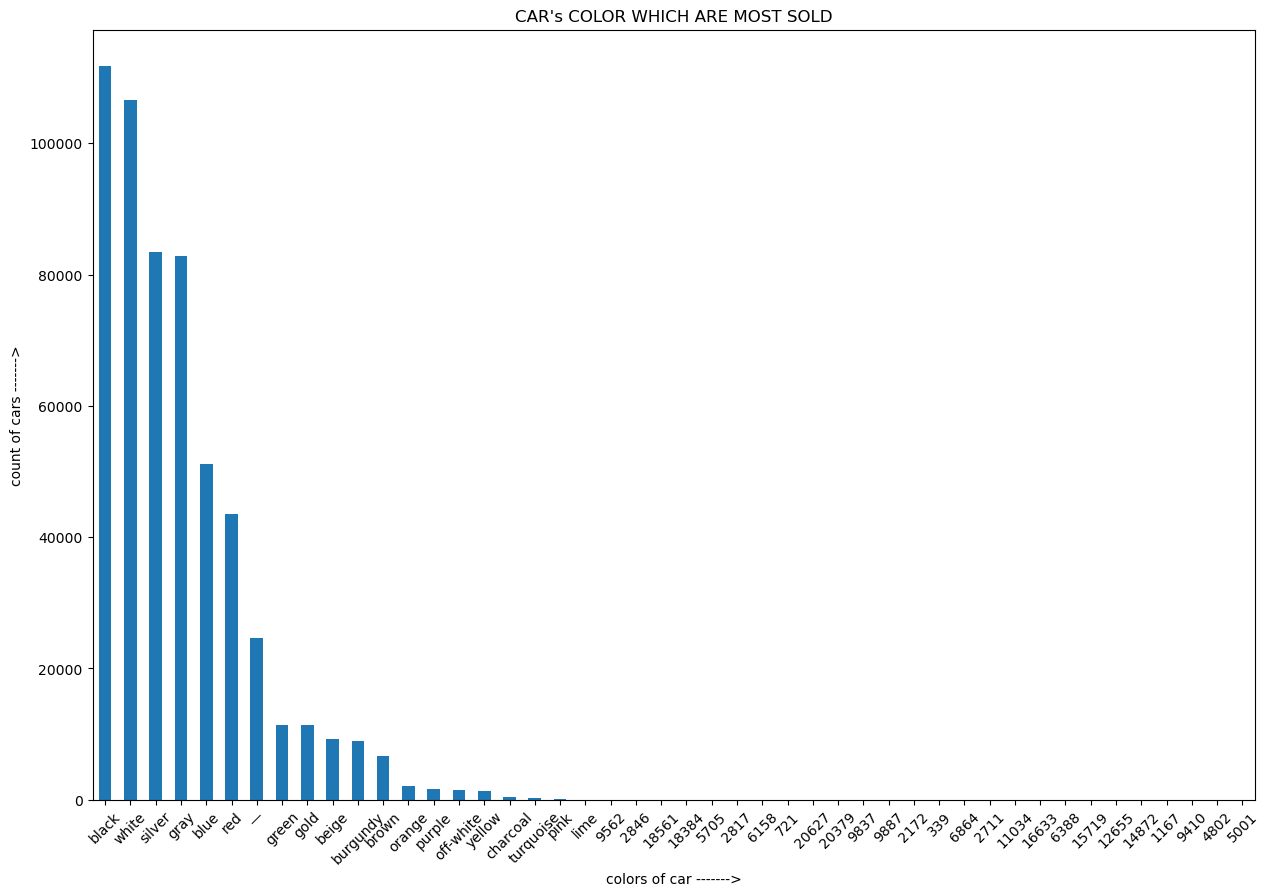

In [33]:
plt.figure(figsize =(15,10))
car_price_data['color'].value_counts().plot(kind = 'bar')
plt.title("CAR's COLOR WHICH ARE MOST SOLD")
plt.xlabel("colors of car ------->")
plt.ylabel("count of cars ------->")
plt.xticks(rotation = 45)
plt.show()

In [34]:
print("COMPANY WHICH HAD SOLD THE MOST CARS AND IT's TOP COLOR ")
car_price_data.groupby('make')['color'].value_counts().idxmax()

COMPANY WHICH HAD SOLD THE MOST CARS AND IT's TOP COLOR 


('Ford', 'white')

In [35]:
sellingprice_of_company = car_price_data.groupby("make")["sellingprice"].sum()

In [36]:
print("TOP 20 COMPANIES THOSE ARE PROFIT THE MOST FROM YEAR 1982 - 2015")
profit_all_company = sellingprice_of_company.sort_values(ascending  = False).head(20)
profit_all_company

TOP 20 COMPANIES THOSE ARE PROFIT THE MOST FROM YEAR 1982 - 2015


make
Ford             1.452675e+09
Chevrolet        7.210034e+08
Nissan           6.332730e+08
Toyota           4.883927e+08
BMW              4.442546e+08
Mercedes-Benz    3.700839e+08
Dodge            3.441642e+08
Infiniti         3.124892e+08
Honda            2.976454e+08
Lexus            2.406151e+08
Hyundai          2.402084e+08
Jeep             2.305838e+08
Kia              2.134686e+08
Chrysler         1.929191e+08
GMC              1.799053e+08
Volkswagen       1.180564e+08
Audi             1.168837e+08
Ram              1.157219e+08
Cadillac         1.144479e+08
Lincoln          9.685966e+07
Name: sellingprice, dtype: float64

BY THIS PIE CHART WE VISUALIZED THE VOLUME OF PROFIT OF TOP 20 COMPANY FROM 1982 - 2015 

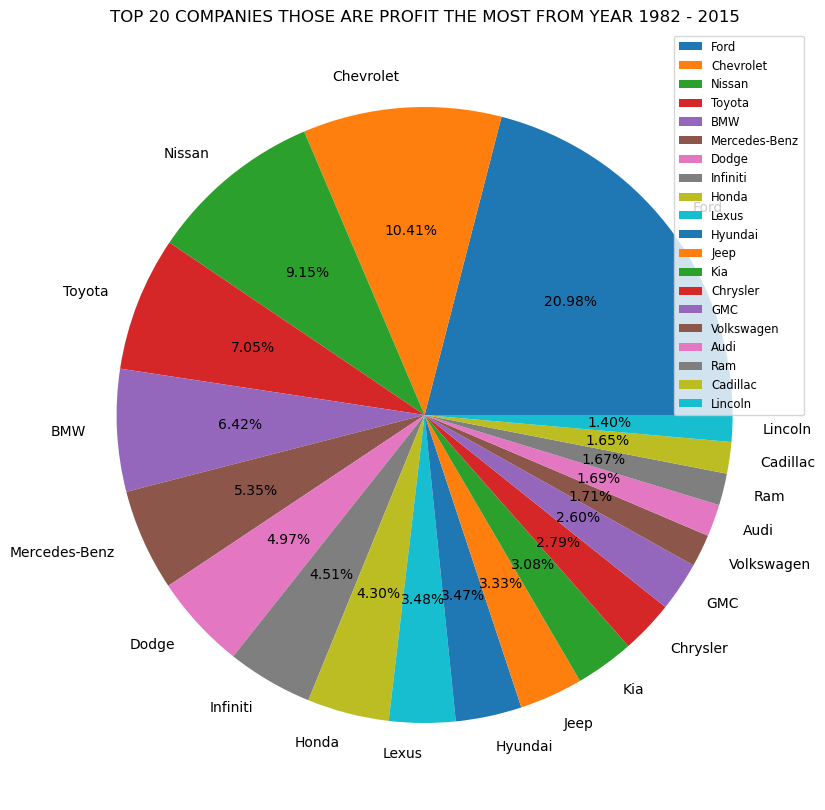

In [37]:
plt.figure(figsize = (15,10))
plt.pie(profit_all_company.values , labels = profit_all_company.index , autopct = '%1.2f%%' )
plt.title("TOP 20 COMPANIES THOSE ARE PROFIT THE MOST FROM YEAR 1982 - 2015")
plt.legend(fontsize = 'small')
plt.show()

In [38]:
print('TOP 10 STATE WHERE MOST OF THE COMPANY SOLD THEIR CARS')
state_price = car_price_data["state"].value_counts().head(10)
state_price

TOP 10 STATE WHERE MOST OF THE COMPANY SOLD THEIR CARS


state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
Name: count, dtype: int64

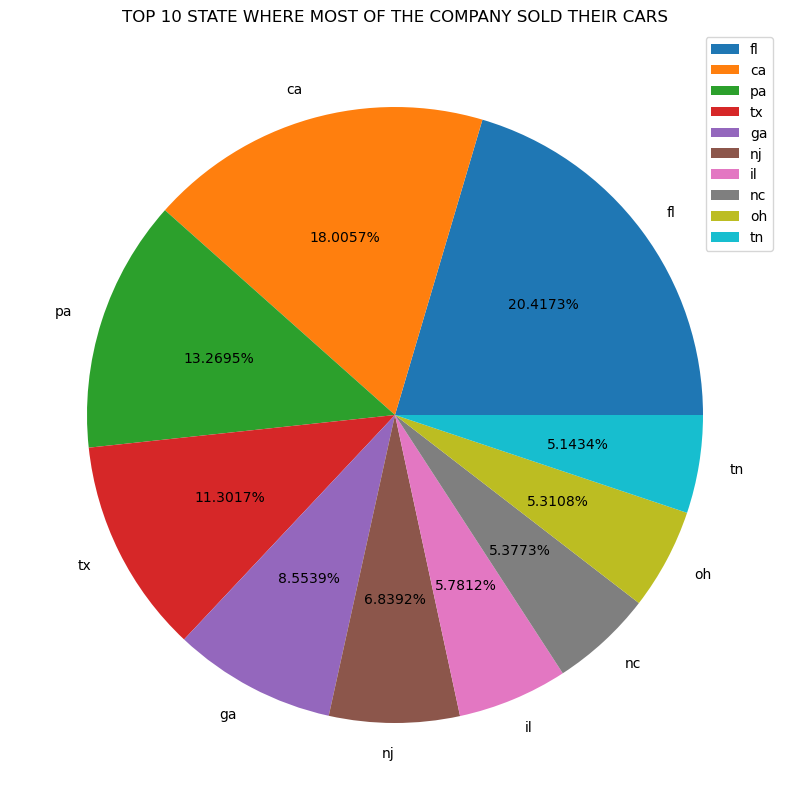

In [39]:
plt.figure(figsize = (15,10))
plt.pie(state_price.values , labels = state_price.index , autopct = '%1.4f%%' )
plt.title("TOP 10 STATE WHERE MOST OF THE COMPANY SOLD THEIR CARS")
plt.legend()
plt.show()

In [40]:
#want to find out that which company earns most profit in fl state
state_sales = car_price_data.groupby('state')['sellingprice'].sum()

In [41]:
top_state = state_sales.idxmax()

In [42]:
top_state_data = car_price_data[car_price_data['state'] == top_state]

In [43]:
top_company_top_state = top_state_data.groupby('make')['sellingprice'].sum()

In [44]:
top_company = top_company_top_state.idxmax()
top_company_sales = top_company_top_state.max()
print(f''' 
        TOP SOLD STATE - {top_state} 
        TOP COMPANY IN THAT STATE - {top_company}
        TOTAL SELLING PRICE OF THAT COMPANY IN THIS STATE - {top_company_sales}''')

 
        TOP SOLD STATE - fl 
        TOP COMPANY IN THAT STATE - Ford
        TOTAL SELLING PRICE OF THAT COMPANY IN THIS STATE - 159438920.0


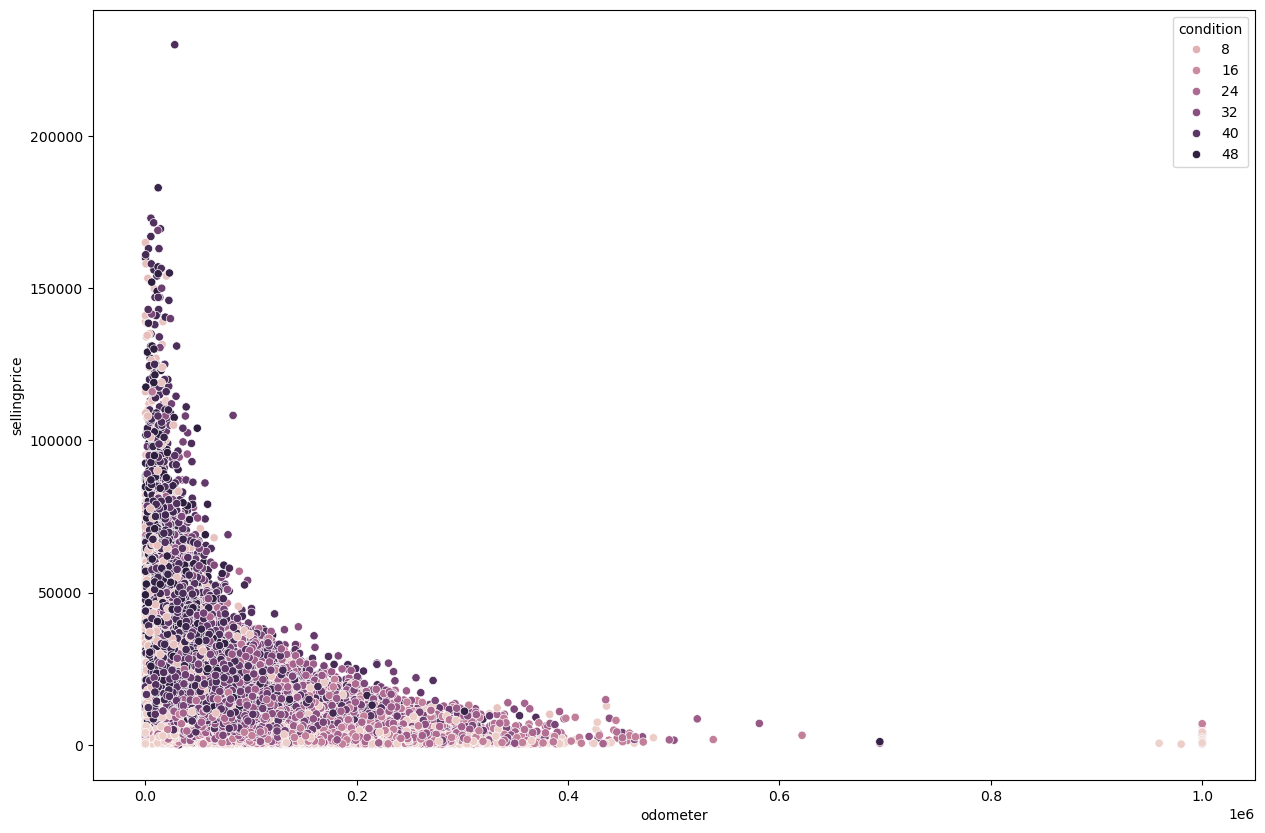

In [45]:
plt.figure(figsize = (15,10))
sns.scatterplot(x='odometer', y='sellingprice', hue='condition', data=car_price_data)
plt.show()